# Домашнее задание. Свёрточные сети

Здесь вам предстоит построить и обучить свою первую свёрточную сеть для классификации изображений на данных CIFAR10. 

In [2]:
import tensorflow as tf

from tqdm import tqdm_notebook

## Данные

CIFAR10
* 60000 RGB изображений размером 32x32x3
* 10 классов: самолёты, собаки, рыбы и т.п.

<img src="https://www.samyzaf.com/ML/cifar10/cifar1.jpg" style="width:60%">

Загрузите данные, разделите их на обучающую и тестовую выборки. Размер тестовой выборки должен быть $10^4$.

In [3]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
(40000, 32, 32, 3) (40000, 1)


In [4]:
a = np.array(cifar10.load_data())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


Прежде чем приступать к основной работе, стоит убедиться что загруженно именно то, что требовалось:

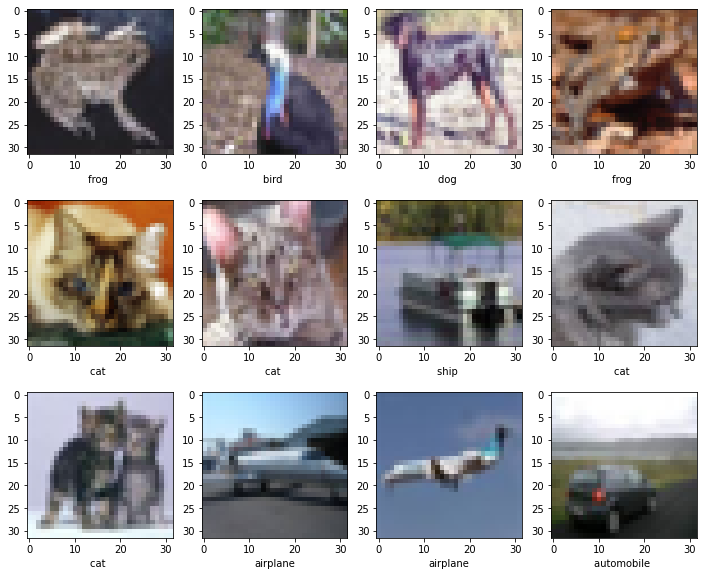

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

## Подготовка данных

Сейчас каждый пиксель изображения закодирован тройкой чисел (RGB) __от 0 до 255__. Однако лучше себя показывает подход, где значения входов нейросети распределены недалеко от 0.

Давайте приведём все данные в диапазон __`[0, 1]`__ — просто разделим на соответствующий коэффициент:

In [6]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Исполните код ниже для проверки, что все выполнено корректно.

In [7]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

## Архитектура сети

Для начала реализуйте простую нейросеть:
1. принимает на вход картинки размера 32 x 32 x 3;
2. вытягивает их в вектор (`keras.layers.Flatten`);
3. пропускает через 1 или 2 полносвязных слоя;
4. выходной слой отдает вероятности принадлежности к каждому из 10 классов.

Создайте полносвязную сеть:

In [8]:
import keras
from keras import layers as L
from keras import backend as K

In [18]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(32, activation="tanh"),
    #второй полносвяный слой
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),]
)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=5,
          validation_split=0.2) 

Epoch 1/5
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0751 - accuracy: 0.2017 - val_loss: 1.9785 - val_accuracy: 0.2444
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9697 - accuracy: 0.2689 - val_loss: 1.9362 - val_accuracy: 0.2889
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9376 - accuracy: 0.2828 - val_loss: 1.9472 - val_accuracy: 0.2627
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9093 - accuracy: 0.3048 - val_loss: 1.9180 - val_accuracy: 0.3059
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8855 - accuracy: 0.3153 - val_loss: 1.8985 - val_accuracy: 0.3077


In [19]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

Успех!


In [20]:
dummy_pred

array([[0.05988115, 0.14278276, 0.05188534, 0.1733999 , 0.02792975,
        0.2623586 , 0.10120534, 0.073461  , 0.08039229, 0.02670387],
       [0.06400817, 0.3659683 , 0.02720441, 0.07597712, 0.0165698 ,
        0.06278055, 0.01969714, 0.02036593, 0.27250922, 0.07491939],
       [0.07846899, 0.06742488, 0.08972885, 0.1640393 , 0.09787489,
        0.23700993, 0.07489944, 0.06153897, 0.10785758, 0.0211572 ],
       [0.02121609, 0.02627613, 0.10455379, 0.11494669, 0.17864706,
        0.12429216, 0.25379062, 0.13836646, 0.00516246, 0.03274856],
       [0.0350334 , 0.02353292, 0.20492537, 0.11386975, 0.21677755,
        0.11287268, 0.17395304, 0.09037274, 0.01180695, 0.01685568],
       [0.0917211 , 0.06184179, 0.12306271, 0.18302715, 0.09831504,
        0.20159537, 0.07543962, 0.06443583, 0.0756075 , 0.02495388],
       [0.05652283, 0.37395257, 0.04233207, 0.09071738, 0.02584298,
        0.06342507, 0.02697505, 0.0279576 , 0.18180174, 0.11047275],
       [0.17768729, 0.09308378, 0.0806886

## Обучение сети

**Задание 1.1 (обязательно)** Будем минимизировать многоклассовую кроссэкнропию с помощью __sgd__. Вам нужно получить сеть, которая достигнет __не менее 45%__ __accuracy__ на тестовых данных.

__Важно:__ поскольку в y_train лежат номера классов, Керасу нужно либо указать sparse функции потерь и метрики оценки качества классификации (`sparse_categorical_crossentropy` и `sparse_categorical_accuracy`), либо конвертировать метки в one-hot формат.

### Полезные советы
* `model.compile` позволяет указать, какие метрики вы хотите вычислять.
* В `model.fit` можно передать валидационную выборку (`validation_data=[X_val, y_val]`), для отслеживания прогресса на ней. Также рекомендуем сохранять результаты в [tensorboard](https://keras.io/callbacks/#tensorboard) или [wandb](https://docs.wandb.ai/integrations/jupyter). **Важно: логи tensorboard не получится без боли посмотреть через colab.** Workaround: скачать логи и запустить tensorboard локально или помучаться [с этим](https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab).
* По умолчанию сеть учится 1 эпоху. Совсем не факт, что вам этого хватит. Число эпох можно настроить в методе `fit` (`epochs`).
* Ещё у Кераса есть много [полезных callback-ов](https://keras.io/callbacks/), которые можно попробовать. Например, автоматическая остановка или подбор скорости обучения.

In [16]:
#y_train, y_val = (tf.keras.utils.to_categorical(y) for y in (y_train, y_val))

In [21]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [22]:

model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(256, activation="relu"),
    #второй полносвяный слой
    #keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(10, activation="softmax"),]
)
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#y_train_labels = tf.keras.utils.to_categorical(y_train)
tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='sample/', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, 
          y_train_labels,
          batch_size=32 , 
          epochs=30,
          callbacks=[tensorboard_cbk],
          validation_split=0.2) 
from sklearn.metrics import accuracy_score
print ("test accuracy: ", accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/30
1000/1000 [==============================] - 5s 4ms/step - loss: 1.9235 - accuracy: 0.3124 - val_loss: 1.7939 - val_accuracy: 0.3699
Epoch 2/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7572 - accuracy: 0.3828 - val_loss: 1.7346 - val_accuracy: 0.3902
Epoch 3/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6790 - accuracy: 0.4103 - val_loss: 1.6820 - val_accuracy: 0.4006
Epoch 4/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6280 - accuracy: 0.4278 - val_loss: 1.6135 - val_accuracy: 0.4320
Epoch 5/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5852 - accuracy: 0.4438 - val_loss: 1.5874 - val_accuracy: 0.4453
Epoch 6/30
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5489 - accuracy: 0.4584 - val_loss: 1.6047 - val_accuracy: 0.4310
Epoch 7/30
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5215 - accuracy: 0.4690 - val_loss: 1.5741 - val_accuracy:

In [20]:
keras.callbacks.History

keras.callbacks.History

In [21]:


#model.compile(# Your code here)
#model.fit(# Your code here)

А теперь можно проверить качество вашей сети, выполнив код ниже:

In [23]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.5066
 Not bad!


## Карманная сверточная сеть

**Задание 1.2 (обязательно)** Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [27]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),]
)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=20,
          validation_split=0.2) 
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/20
1000/1000 [==============================] - 10s 5ms/step - loss: 1.5502 - accuracy: 0.4414 - val_loss: 1.3452 - val_accuracy: 0.5244
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2658 - accuracy: 0.5527 - val_loss: 1.2732 - val_accuracy: 0.5450
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1470 - accuracy: 0.5972 - val_loss: 1.2223 - val_accuracy: 0.5723
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0615 - accuracy: 0.6248 - val_loss: 1.2291 - val_accuracy: 0.5631
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9856 - accuracy: 0.6515 - val_loss: 1.1751 - val_accuracy: 0.5841
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9212 - accuracy: 0.6748 - val_loss: 1.2124 - val_accuracy: 0.5801
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.8599 - accuracy: 0.6967 - val_loss: 1.1834 - val_accuracy

Давайте посмотрим, смогла ли карманная сверточная сеть побить заданный порог по качеству:

In [28]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")



 Test_acc = 0.588
 Not bad!


## Учимся учить

А теперь научимся сравнивать кривые обучения моделей — зависимости значения accuracy от количества итераций. 

Вам потребуется реализовать _экспериментальный стенд_ — вспомогательный код, в который вы сможете подать несколько архитектур и методов обучения, чтобы он их обучил и вывел графики кривых обучения. Это можно сделать с помощью `keras.callbacks` — `TensorBoard` или `History`.

Будьте морально готовы, что на обучение уйдёт _много времени_. Даже если вы ограничитесь 10 эпохами. Пока идёт обучение, вы можете переключиться на другие задания или заняться чем-нибудь приятным: поспать, например.

**Задание 1.3 (опционально)** Попробуйте использовать различные методы оптимизации (sgd, momentum, adam) с параметрами по умолчанию. Какой из методов работает лучше?

Для удобства напишем класс Evaluator, который принимает в себя дикты виды {имя_оптимайзера: инстанс}, {имя модели: инстанс} и обучает всевозможные комбинации моделей с оптимайзерами при помощи метода fit (попутно записывая логи отдельно для каждой модели). Также пригодится метод evaluate для отображения итоговых скоров.

Пользоваться классом не обязательно. По умолчанию класс использует tensorboard. Если вы выше использовали wandb -- советуем дописать callback.

In [29]:
class Evaluator(list):
    def __init__(self, models, optimizers='adam', loss=keras.losses.categorical_crossentropy,
                 metrics=[keras.metrics.categorical_accuracy]):
        '''
            models: dict {name: model}
            optimizers: list of optimizers or just one optimizer
        '''
        if not isinstance(models, dict):
            models = {'single_model': models}
        if not isinstance(optimizers, dict):
            optimizers = {str(optimizers.__class__): optimizers}
        super().__init__([(model_name, keras.models.clone_model(model), optimizer_name, optimizer)
                          for model_name, model in models.items()
                          for optimizer_name, optimizer in optimizers.items()])
        for _, model, _, optimizer in self:
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
            
    def fit(self, X, y, validation_data=(), max_epochs=100, verbose=0, callbacks=[], batch_size=32):
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit(X, y, validation_data=validation_data or None, epochs=max_epochs, verbose=verbose,
                      batch_size=batch_size, callbacks=callbacks + [keras.callbacks.TensorBoard(
                          log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])
            
    def fit_generator(self, X, y, validation_data=(), max_epochs=100, verbose=1, callbacks=[], batch_size=32):
        datagen = keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit_generator(datagen.flow(X, y, batch_size=batch_size), epochs=max_epochs,
                validation_data=validation_data or None, verbose=verbose,
                callbacks=callbacks + [keras.callbacks.TensorBoard(
                    log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])
        
    def evaluate(self, X, y, metric):
        for model_name, model, optimizer_name, _ in self:
            print('Final score of {}_{} is {}'.format(model_name, optimizer_name,
                  metric(y_test, model.predict_classes(X_test))))

In [30]:
!rm -rf ./logs

In [31]:
optimizers = {
    'sgd': 'SGD',
    'adam': 'adam'
}
modelsgd = keras.models.Sequential([keras.Input(shape=(32, 32, 3)), keras.layers.Flatten()])
modeladam = model = keras.models.Sequential([keras.Input(shape=(32, 32, 3)), keras.layers.Flatten()])
models = {
    'model_sgd': modelsgd,
    'model_adam': modeladam
}

In [ ]:
Попробуем использовать различные алгоритмы оптимизации такие как RMSprop

In [32]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(256, activation="relu"),
    #второй полносвяный слой
    #keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(10, activation="softmax"),]
)

model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#y_train_labels = tf.keras.utils.to_categorical(y_train)
tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='sample/', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, 
          y_train_labels,
          batch_size=32 , 
          epochs=25,
          callbacks=[tensorboard_cbk],
          validation_split=0.2) 
print ("test accuracy: ", accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/25
1000/1000 [==============================] - 6s 5ms/step - loss: 2.0963 - accuracy: 0.2786 - val_loss: 1.8215 - val_accuracy: 0.3191
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7848 - accuracy: 0.3627 - val_loss: 1.7327 - val_accuracy: 0.3831
Epoch 3/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7137 - accuracy: 0.3899 - val_loss: 1.6734 - val_accuracy: 0.4047
Epoch 4/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6677 - accuracy: 0.4112 - val_loss: 1.7050 - val_accuracy: 0.3915
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6379 - accuracy: 0.4215 - val_loss: 1.6560 - val_accuracy: 0.4100
Epoch 6/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6099 - accuracy: 0.4299 - val_loss: 1.6657 - val_accuracy: 0.4086
Epoch 7/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5917 - accuracy: 0.4365 - val_loss: 1.6775 - val_accuracy:

In [33]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(256, activation="relu"),
    #второй полносвяный слой
    #keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(10, activation="softmax"),]
)

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#y_train_labels = tf.keras.utils.to_categorical(y_train)
tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='sample/', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, 
          y_train_labels,
          batch_size=32 , 
          epochs=25,
          callbacks=[tensorboard_cbk],
          validation_split=0.2) 
print ("test accuracy: ", accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/25
1000/1000 [==============================] - 5s 5ms/step - loss: 1.9538 - accuracy: 0.3046 - val_loss: 1.8334 - val_accuracy: 0.3372
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7712 - accuracy: 0.3690 - val_loss: 1.7398 - val_accuracy: 0.3741
Epoch 3/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7080 - accuracy: 0.3892 - val_loss: 1.6813 - val_accuracy: 0.3884
Epoch 4/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6637 - accuracy: 0.4094 - val_loss: 1.6934 - val_accuracy: 0.3935
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6308 - accuracy: 0.4225 - val_loss: 1.6487 - val_accuracy: 0.4059
Epoch 6/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6142 - accuracy: 0.4290 - val_loss: 1.6615 - val_accuracy: 0.4150
Epoch 7/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5922 - accuracy: 0.4342 - val_loss: 1.6252 - val_accuracy:

In [24]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(256, activation="relu"),
    #второй полносвяный слой
    #keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(10, activation="softmax"),]
)

model.compile(optimizer='Adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#y_train_labels = tf.keras.utils.to_categorical(y_train)
tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='sample/', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, 
          y_train_labels,
          batch_size=32 , 
          epochs=25,
          callbacks=[tensorboard_cbk],
          validation_split=0.2) 
print ("test accuracy: ", accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/25
1000/1000 [==============================] - 5s 4ms/step - loss: 1.9978 - accuracy: 0.2912 - val_loss: 1.8931 - val_accuracy: 0.3402
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8555 - accuracy: 0.3538 - val_loss: 1.8264 - val_accuracy: 0.3618
Epoch 3/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8064 - accuracy: 0.3741 - val_loss: 1.7960 - val_accuracy: 0.3716
Epoch 4/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7731 - accuracy: 0.3882 - val_loss: 1.7751 - val_accuracy: 0.3801
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7475 - accuracy: 0.3989 - val_loss: 1.7603 - val_accuracy: 0.3809
Epoch 6/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7261 - accuracy: 0.4055 - val_loss: 1.7349 - val_accuracy: 0.3971
Epoch 7/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7091 - accuracy: 0.4124 - val_loss: 1.7305 - val_accuracy:

In [25]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(256, activation="relu"),
    #второй полносвяный слой
    #keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(10, activation="softmax"),]
)

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#y_train_labels = tf.keras.utils.to_categorical(y_train)
tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='sample/', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, 
          y_train_labels,
          batch_size=32 , 
          epochs=25,
          callbacks=[tensorboard_cbk],
          validation_split=0.2) 
print ("test accuracy: ", accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9285 - accuracy: 0.3085 - val_loss: 1.8559 - val_accuracy: 0.3216
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7572 - accuracy: 0.3806 - val_loss: 1.7396 - val_accuracy: 0.3831
Epoch 3/25
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6829 - accuracy: 0.4084 - val_loss: 1.6548 - val_accuracy: 0.4204
Epoch 4/25
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6300 - accuracy: 0.4269 - val_loss: 1.6302 - val_accuracy: 0.4249
Epoch 5/25
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5873 - accuracy: 0.4465 - val_loss: 1.6273 - val_accuracy: 0.4193
Epoch 6/25
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5549 - accuracy: 0.4566 - val_loss: 1.5676 - val_accuracy: 0.4467
Epoch 7/25
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5233 - accuracy: 0.4674 - val_loss: 1.5591 - val_accuracy:

In [ ]:
evaluator = Evaluator(model, optimizers=optimizers)
evaluator.fit(X_train, y_train_labels, validation_data=(X_val, y_val))
evaluator.evaluate(X_test, y_test, accuracy_score)

Прокомментируйте полученные результаты.

При тестировании оптимизаторов SGD (0.49), Adam(0.45), Adagrad (0.44), RMSprop(0.45) лучший результат показал SGD (градиентный спуск). воможно поигравшись с параметрами можно было улучшить показатели но пока это для меня за гранью возможного

**Задание 1.4 (опционально)** Добавьте нормализацию по батчу (`BatchNormalization`) между свёрткой и активацией. Попробуйте использовать несколько нормализаций — в свёрточных и полносвязных слоях.

Для удобства реализуем класс Models, который по сути будет являться списком моделей с двумя методами: add (добавить слой ко всем моделям) и add_create (создать новую модель на основе базовой с дополнительным слоем). Пользоваться им необязательно, но вдруг :)

In [ ]:
from collections import OrderedDict

class Models(OrderedDict):
    def __init__(self, models):
        if not isinstance(models, dict):
            models = OrderedDict({'base_model': models})
        super().__init__(models)
        
    def add(self, layer):
        for name, model in self.items():
            model.add(layer)
            
    def add_create(self, name, layer):
        base_model = next(iter(self.items()))[1]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})
        
    def add_update(self, name, layer):
        base_model = self[next(reversed(self))]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})

# Example of usage 
# models = Models(keras.Sequential())
# models.add(L.InputLayer(input_shape=(32, 32, 3)))
# models.add(L.Convolution2D(filters=10, kernel_size=(3, 3)))
# models.add(L.MaxPooling2D())
# models.add_create('conv_batchnorm', L.BatchNormalization())
# models.add(L.Activation('relu'))
# ...

Без нормализации:

In [28]:
model0 = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           input_shape=X_train.shape[1:]),
    keras.layers.Activation('relu'),        
   
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
   
    keras.layers.Flatten(),
 
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.Activation('relu'),])

model0.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model0.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=20,
          validation_split=0.2) 
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(model0.predict(X_test),axis=1)))

Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7120 - accuracy: 0.4002 - val_loss: 1.5385 - val_accuracy: 0.4569
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4280 - accuracy: 0.5010 - val_loss: 1.3772 - val_accuracy: 0.5241
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3184 - accuracy: 0.5431 - val_loss: 1.3426 - val_accuracy: 0.5325
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2459 - accuracy: 0.5687 - val_loss: 1.2903 - val_accuracy: 0.5529
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2013 - accuracy: 0.5816 - val_loss: 1.2981 - val_accuracy: 0.5444
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1651 - accuracy: 0.5937 - val_loss: 1.2569 - val_accuracy: 0.5642
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1386 - accuracy: 0.6052 - val_loss: 1.2313 - val_accuracy:

Попробоуем добавить нормализацию в свертку:

In [27]:
model1 = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),        
   
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
   
    keras.layers.Flatten(),
 
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.Activation('relu'),])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model1.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=20,
          validation_split=0.2) 
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(model1.predict(X_test),axis=1)))

Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6172 - accuracy: 0.4360 - val_loss: 1.5911 - val_accuracy: 0.4367
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3091 - accuracy: 0.5417 - val_loss: 1.3258 - val_accuracy: 0.5393
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2055 - accuracy: 0.5782 - val_loss: 1.3547 - val_accuracy: 0.5291
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1439 - accuracy: 0.6036 - val_loss: 1.2333 - val_accuracy: 0.5756
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0942 - accuracy: 0.6239 - val_loss: 1.2819 - val_accuracy: 0.5591
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0537 - accuracy: 0.6358 - val_loss: 1.4588 - val_accuracy: 0.5301
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0213 - accuracy: 0.6498 - val_loss: 1.2579 - val_accuracy:

добавим нормализацию в полносвязный слой:

In [29]:
model2 = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           input_shape=X_train.shape[1:]),
    keras.layers.Activation('relu'),        
   
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
   
    keras.layers.Flatten(),
 
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model2.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=20,
          validation_split=0.2) 
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(model2.predict(X_test),axis=1)))

Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.8692 - accuracy: 0.1647 - val_loss: 3.6908 - val_accuracy: 0.1014
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3182 - accuracy: 0.0994 - val_loss: 2.3083 - val_accuracy: 0.0988
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3052 - accuracy: 0.1000 - val_loss: 2.3048 - val_accuracy: 0.1019
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3038 - accuracy: 0.1014 - val_loss: 2.3031 - val_accuracy: 0.1016
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3040 - accuracy: 0.0987 - val_loss: 2.3036 - val_accuracy: 0.1016
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3039 - accuracy: 0.1031 - val_loss: 2.3031 - val_accuracy: 0.0940
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3042 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy:

Добавим нормализацию между слоями

In [10]:
model3 = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           input_shape=X_train.shape[1:]),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation="softmax"),])
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model3.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=20,
          validation_split=0.2)
from sklearn.metrics import accuracy_score 
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(model3.predict(X_test),axis=1)))

Epoch 1/20
1000/1000 [==============================] - 19s 19ms/step - loss: 1.6626 - accuracy: 0.3920 - val_loss: 1.5548 - val_accuracy: 0.4363
Epoch 2/20
1000/1000 [==============================] - 19s 19ms/step - loss: 1.3555 - accuracy: 0.5123 - val_loss: 1.3752 - val_accuracy: 0.5089
Epoch 3/20
1000/1000 [==============================] - 18s 18ms/step - loss: 1.2522 - accuracy: 0.5548 - val_loss: 1.4511 - val_accuracy: 0.4919
Epoch 4/20
1000/1000 [==============================] - 19s 19ms/step - loss: 1.1868 - accuracy: 0.5785 - val_loss: 1.3837 - val_accuracy: 0.5186
Epoch 5/20
1000/1000 [==============================] - 19s 19ms/step - loss: 1.1395 - accuracy: 0.5965 - val_loss: 1.3388 - val_accuracy: 0.5331
Epoch 6/20
1000/1000 [==============================] - 19s 19ms/step - loss: 1.0984 - accuracy: 0.6136 - val_loss: 1.5660 - val_accuracy: 0.4895
Epoch 7/20
1000/1000 [==============================] - 19s 19ms/step - loss: 1.0661 - accuracy: 0.6222 - val_loss: 1.3142 -

- без нормализации 0.58
- нормализация в свертке 0.57
- нормализация в полносвязном слое 0.11
- нормализация между слоями 0.55
Как видим, для данной модели нормализация оказалась даже немного вредной, особенно в полносвязном слое. при более многослойной модели нормализация должна дать прирост в скорости и точности.

**Задание 1.5 (опционально)** Посмотрите на batch_size (параметр model.fit) - при большем батче модель будет быстрее проходить эпохи, но с совсем огромным батчом вам потребуется больше эпох для сходимости (т.к. сеть делает меньше шагов за одну эпоху).
Найдите такое значение, при котором модель быстрее достигает точности 55%. **Hint**: используйте early stopping callback.

**Задание 1.6 (опционально)** Попробуйте найти такую комбинацию метода обучения и нормализации, при которой сеть имеет наилучшую кривую обучения. Поясните, что вы понимаете под "наилучшей" кривой обучения.

## Свёрточная нейросеть здорового человека

**Задание 1.7 (обязательно попытаться)** Наигравшись выше, обучим большую свёрточную сеть, которая даст на тестовой выборке __accuracy больше 80%__. В этом задании вам потребуется провести эксперименты, сравнив их между собой в конце. Возможно, может быть несколько проще, если писать выводы во время или сразу после каждого эксперимента, после чего сделать общие выводы.

Рекомендуем начать с лучшей модели предыдущего задания и постепенно её улучшать. Вы можете использовать всё, что угодно: любые активации, сколь угодно большие свёрточные слои и глубокие сети. Единственное ограничение: __нельзя использовать предобученные сети и дополнительные данные__.

### Полезные советы
* Для начала, неплохо бы научить что-нибудь побольше, чем 10 фильтров 3x3.
* __Главное правило: одно изменение на эксперимент__. Если у вас есть 2 идеи по улучшению сети, сначала попробуйте их независимо. Может оказаться, что одно из них дало __+10%__ точности а другое __-7%__. А вы так и будете думать, что сделали 2 полезных изменения которые в сумме дают __+3%__. Если какая-то идея не работает — даже если она вам нравится - опишите ее и выкидывайте из дальнейших экспериментов.
* __Be careful or you will dropout__. Дропаут (`L.Dropout`) может позволить вам обучить в несколько раз бОльшую сеть без переобучения, выжав несколько процентов качества. Это круто, но не стоит сразу ставить dropout 50%. Во-первых, слишком сильный дропаут только ухудшит сеть (underfitting). Во-вторых, даже если дропаут улучшает качество, он замедляет обучение. Рекомендуем начинать с небольшого дропаута, быстро провести основные эксперименты, а потом жахнуть в 2 раза больше нейронов и дропаута ~~на ночь~~.
* __Аугментация данных__. Если котика слегка повернуть и подрезать (простите), он всё равно останется котиком. А в керасе есть [удобный класс](https://keras.io/preprocessing/image/), который поставит подрезание котиков на поток. Ещё можно сделать этот трюк в тесте: вертим картинку 10 раз, предсказываем вероятности и усредняем. Только один совет: прежде, чем учить, посмотрите глазами на аугментированные картинки. Если вы сами не можете их различить, то и сеть не сможет.
* __Don't just stack more layers__. Есть более эффективные способы организовать слои, чем простой Sequential. Вот пара идей: [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions](https://arxiv.org/abs/1608.06993). Только не копируйте архитектуру подчистую — вам скорее всего хватит меньшего размера.
* __Долго != плохо__. Более глубокие архитектуры обычно требуют бОльше эпох до сходимости. Это значит, что в первые несколько эпох они могут быть хуже менее глубоких аналогов. Дайте им время, запаситесь чаем и обмажьтесь batch-norm-ом.

In [13]:
modelx = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),

    #1
    keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           padding='same',
                           input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    #2
    keras.layers.Conv2D(filters=128,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=128,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    

    #3
    keras.layers.Conv2D(filters=256,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=256,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    #keras.layers.Conv2D(filters=256,
    #                       kernel_size=(3, 3),
    #                       padding='same',
    #                    ),
    #keras.layers.BatchNormalization(),
    #keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    #keras.layers.Conv2D(filters=256,
    #                       kernel_size=(3, 3),
    #                       padding='same',
    #                    ),
    #keras.layers.BatchNormalization(),
    #keras.layers.Activation('relu'),

    #keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    #4
    keras.layers.Conv2D(filters=512,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=512,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=512,
                           kernel_size=(3, 3),
                           padding='same',
                        ),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    #keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    #первый полносвязный слой
    keras.layers.Dense(2000),
    keras.layers.Dropout(0.8),
    keras.layers.Activation('relu'),
    keras.layers.Dense(2000),
    keras.layers.Dropout(0.8),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation="softmax"),])
modelx.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
modelx.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=25,
          validation_split=0.2) 
from sklearn.metrics import accuracy_score
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(modelx.predict(X_test),axis=1)))

Epoch 1/25
1000/1000 [==============================] - 95s 52ms/step - loss: 2.5281 - accuracy: 0.1384 - val_loss: 2.1165 - val_accuracy: 0.1719
Epoch 2/25
1000/1000 [==============================] - 54s 54ms/step - loss: 1.9948 - accuracy: 0.2225 - val_loss: 1.8206 - val_accuracy: 0.2899
Epoch 3/25
1000/1000 [==============================] - 54s 54ms/step - loss: 1.7672 - accuracy: 0.2900 - val_loss: 1.8035 - val_accuracy: 0.3175
Epoch 4/25
1000/1000 [==============================] - 52s 52ms/step - loss: 1.6944 - accuracy: 0.3363 - val_loss: 1.9208 - val_accuracy: 0.2984
Epoch 5/25
1000/1000 [==============================] - 52s 52ms/step - loss: 1.5403 - accuracy: 0.4262 - val_loss: 1.6815 - val_accuracy: 0.4067
Epoch 6/25
1000/1000 [==============================] - 53s 53ms/step - loss: 1.4056 - accuracy: 0.5154 - val_loss: 1.2719 - val_accuracy: 0.5501
Epoch 7/25
1000/1000 [==============================] - 52s 52ms/step - loss: 1.2991 - accuracy: 0.5638 - val_loss: 1.3823 -

Момент истины: проверьте, какого качества достигла ваша сеть.

In [16]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, np.argmax(modelx.predict(X_test),axis=1))
print("\n Test_acc =", test_acc)
if test_acc > 0.8:
    print("Это победа!")


 Test_acc = 0.8003
Это победа!


А теперь, опишите свои <s>ощущения</s> результаты от проведенных экспериментов. 

1) стартовал с точности 0.55. 
2) пробовал увеличиь количество фильтров - результат стал лучше, но больше 100 не стал, так как прироста большого не увидел.
3) пробовал увеличивать количество нейроном в полносвязном слое - результат улучшился но разница между точностью тренироваочной и валидационной выборки с самом начала была огромной в сторону тренировочной. это говорит о переобучении тренировочной выборки. Поэтому применил регуляризацию, а именно метод Droup out. увеличивал количество нейроно и смотре прирост точности, параллельно увеличивая значение параметра для dropout (процет выключаемых нейронов)
4) добавлял слои последовательно. при определнном количестве (например в 3м слое добавил 3 слоя) результат ухудшался, поэотму оставил 2.
5) поставил нормализацию для сверточных слоев.
6) когда уперся в 75% пришлось обратиться к другим моделям. в качестве эталона выбрал vgg16 и попытался ее реализовать. приблизился вплотную к 80%.